# Mimir: A Holistic Error Correction System

This notebook demonstrates how figures for our publication "Mimir: A Holistic Error Correction System" are generates from the raw measurements.
You cannot repeat any measurements in this notebook, please refer to the `infrastructure/` directory for that purpose.

In [1]:
%load_ext autoreload
%autoreload 2
import plots
from matplotlib import pyplot as plt
import matplotlib

In [2]:
font_path = '/Users/philipp/Library/Fonts/LinLibertine_R.otf'
matplotlib.rcParams.update({
    'font.family': 'Linux Libertine O',
    'mathtext.fontset': 'custom',
    'mathtext.it': 'Linux Libertine O:italic',
    'mathtext.rm': 'Linux Libertine O',
    'text.usetex': False
})

# Table: Comparison With Competitors

In [3]:
df_empty_run = (plots.performance_table('measurements/global-performance/2023-12-26-mimir/',
                        'measurements/global-performance/2023-12-01-baran-baseline/',
                        '2023-12-01-baseline-baran-vs-mirmir',
                        'measurements/global-performance/2023-12-01-garf-baseline/',
                        'measurements/global-performance/2023-12-01-holoclean-baseline/')[0]
.sort_values('normalized_dataset', ascending=True)
.loc[:, ['Mimir', 'Baran', 'HoloClean', 'Garf']])
df_empty_run

Loaded Mimir Results. 0/120 measurements failed.


ensemble,Mimir,Baran,HoloClean,Garf
normalized_dataset,,,,
137 \n cat 5%,0.85,0.55,NaN,NaN
137 5%,0.71,0.58,NaN,NaN
1481 \n cat 5%,1.00,1.00,1.00,NaN
1481 5%,0.67,0.53,0.25,NaN
151 \n cat 5%,1.00,0.75,0.95,NaN
151 5%,0.88,0.86,0.69,NaN
184 \n cat 5%,1.00,1.00,1.00,NaN
184 5%,0.72,0.58,0.39,NaN
41027 \n cat 5%,0.74,0.60,0.00,NaN


In [4]:
print(f"Mimir < Baran: {len(df_empty_run[(df_empty_run['Mimir'] + 0.03) < df_empty_run['Baran']])} datasets")
print(f"Mimir > Baran: {len(df_empty_run[df_empty_run['Mimir'] > (df_empty_run['Baran'] + 0.03)])} datasets")
print(f"Mimir avg: {df_empty_run['Mimir'].mean()}")
print(f"Baran avg: {df_empty_run['Baran'].mean()}")

Mimir < Baran: 1 datasets
Mimir > Baran: 21 datasets
Mimir avg: 0.8173076923076923
Baran avg: 0.6719230769230768


# Mimir vs Baran

Loaded Mimir Results. 0/120 measurements failed.


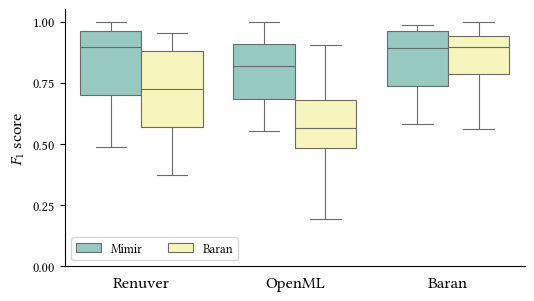

In [30]:
fig, axes, df, failed_measurements = plots.plot_mimir_vs_baran('measurements/global-performance/2023-12-26-mimir/',
                           'measurements/global-performance/2023-12-01-baran-baseline/',
                           '2023-12-01-baseline-baran-vs-mirmir')
plt.savefig('./img/2023-12-21-mirmir-vs-baran.pdf', bbox_inches='tight')

Calculate relative correction quality F1 Score improvement of Mimir over Baran:

In [6]:
df.loc[:, ['dataset_group', 'ensemble', 'F1 Score']].groupby(['ensemble', 'dataset_group']).agg({'F1 Score': ['mean', 'std']})

F1 Score          
                            mean       std
ensemble dataset_group                    
Baran    Baran          0.837892  0.169566
         OpenML         0.604497  0.233737
         Renuver        0.706111  0.191060
Mimir    Baran          0.834497  0.156800
         OpenML         0.806844  0.141843
         Renuver        0.826773  0.164964

In [16]:
df_ensemble = df.loc[:, ['ensemble', 'F1 Score']].groupby(['ensemble']).agg({'F1 Score': ['mean', 'std']})

In [29]:
mimir_f1 = df_ensemble['F1 Score'][df_ensemble['F1 Score'].index == 'Mimir']['mean'][0]
baran_f1 = df_ensemble['F1 Score'][df_ensemble['F1 Score'].index == 'Baran']['mean'][0]

imp = round((mimir_f1 - baran_f1)/baran_f1, 3) * 100

print(f'Mimir achieves an improvment of {imp}% relative to Baran in F1 correction score across all datasets.')
print(f'Mimir achieves an average correction F1-Score of {round(mimir_f1*100, 1)}%, Baran {round(baran_f1*100, 1)}%. Mimir is {round((mimir_f1 - baran_f1)*100, 1)}% better.')

Mimir achieves an improvment of 21.7% relative to Baran in F1 correction score across all datasets.
Mimir achieves an average correction F1-Score of 81.7%, Baran 67.2%. Mimir is 14.6% better.


# ET_CorrFM vs Value Models

Loaded Mimir Results. 0/480 measurements failed.


/Users/philipp/code/mimir/notebook/plots.py:834: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_yticklabels(custom_labels)


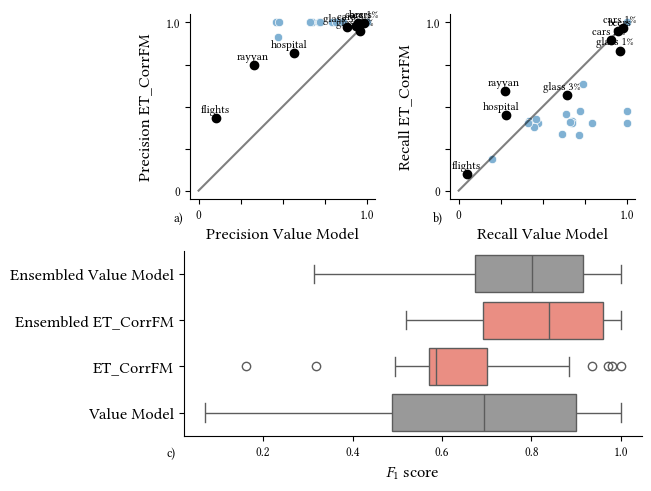

In [64]:
fig, axes, df_scatter = plots.et_corrfm_vs_value_model_v2('measurements/et_corfm-vs-value/')
plt.savefig('./img/2023-12-21-scatter-et_corrfm-vs-value_model.pdf', bbox_inches='tight')

# SC_Phodi vs Vicinity Model

Loaded Mimir Results. 0/480 measurements failed.


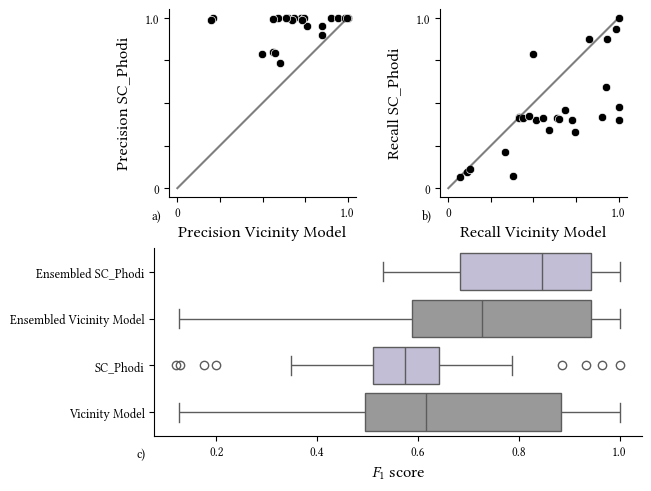

In [63]:
fig, axes, failed = plots.sc_phodi_vs_vicinity_model('measurements/phodi-vs-vicinity/')
plt.savefig('./img/2023-12-21-phodi-vs-vicinity.pdf', bbox_inches='tight')

# Global Ablation Barchart

Loaded Ablation Study. 0/1080 measurements failed.


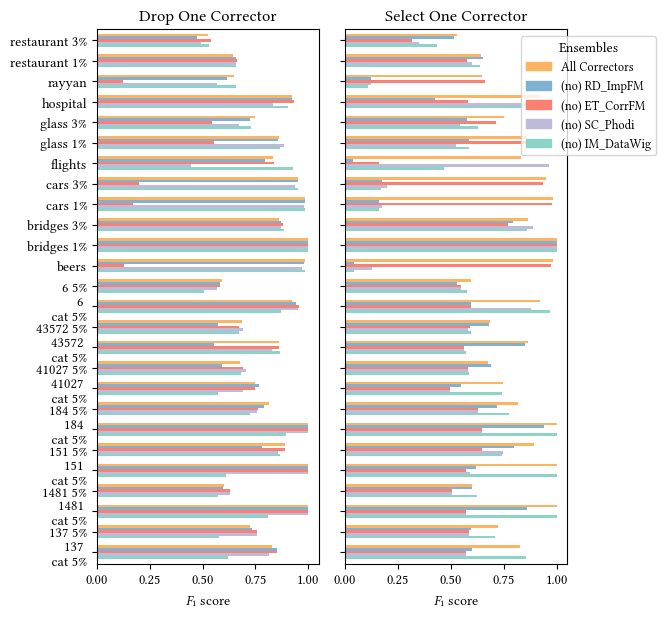

In [11]:
fig, axes, failed = plots.plot_global_ablation_study('measurements/ablation-study/')
plt.savefig('./img/2023-12-21-global-ablation-study.pdf', bbox_inches='tight')

# Global Ablation Scatter

Loaded Mimir Results. 0/1080 measurements failed.


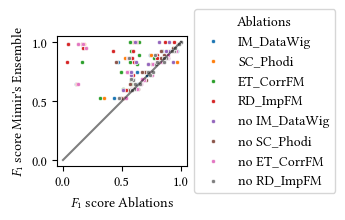

In [62]:
fig, axes, failed_measurements = plots.ablation_scatter('measurements/ablation-study/')
plt.savefig('./img/2023-12-21-global-ablation-study-scatter.pdf', bbox_inches='tight')

# Local Ablation Barchart

Loaded Ablation Study. 0/1080 measurements failed.


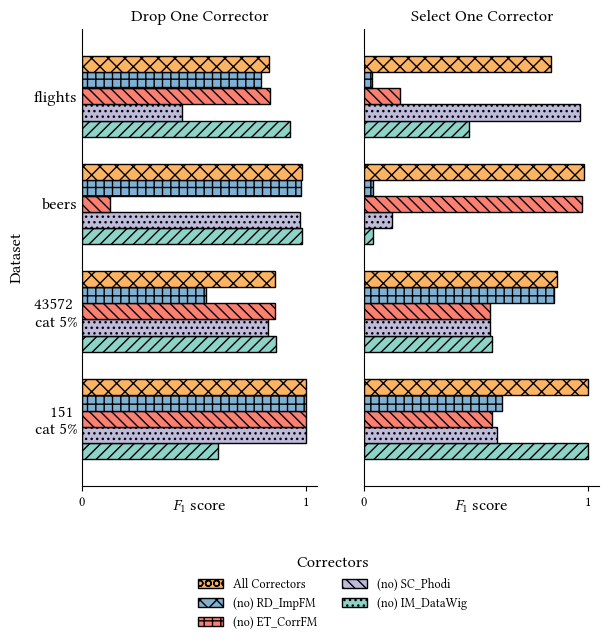

In [13]:
fig, axes, failed = plots.plot_local_ablation_study('measurements/ablation-study/')
plt.savefig('./img/2023-12-21-local-ablation-study.pdf', bbox_inches='tight')

Loaded Ablation Study. 0/1080 measurements failed.
Loaded Mimir Results. 0/1080 measurements failed.


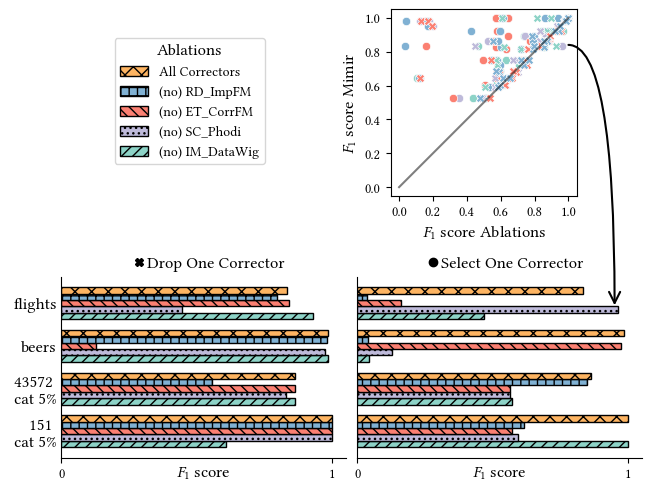

In [66]:
fig, axes, failed, df_scatter = plots.plot_joint_ablation('measurements/ablation-study/')
plt.savefig('./img/2024-01-11-merged-ablation-study.pdf', bbox_inches='tight')

## Ablation Analysis

In [72]:
def find_max_column(row):
    relevant_columns = ['all models', 'auto_instance', 'fd', 'llm_correction',
       'llm_master', 'no auto_instance', 'no fd', 'no llm_correction',
       'no llm_master']
    max_column = max(relevant_columns, key=lambda col: row[col])
    return max_column
    
df = df_scatter.reset_index()
df['max_column'] = df.apply(find_max_column, axis=1)
df.loc[:, ['all models', 'auto_instance', 'fd', 'llm_correction',
       'llm_master', 'no auto_instance', 'no fd', 'no llm_correction',
       'no llm_master']].mean().sort_values()

feature_generators
llm_master           0.565127
fd                   0.573585
llm_correction       0.640210
auto_instance        0.641024
no llm_correction    0.691306
no auto_instance     0.766491
no fd                0.790612
no llm_master        0.792420
all models           0.819451
dtype: float64